# Part 2: GAN

11812804 董正

![](small_DCGAN_train.gif)

## Task 1: Implementation

This is an implementation for [DCGAN](https://arxiv.org/abs/1511.06434).

![](https://pytorch.org/tutorials/_images/dcgan_generator.png)

References:
- PyTorch Tutorial: https://pytorch.org/tutorials/beginner/dcgan_faces_tutorial.html
- TensorFlow Tutorial: https://www.tensorflow.org/tutorials/generative/dcgan?hl=zh-cn

### Generator

Five transpose convolution layers to generate a fake image from noises.

In [10]:
from DCGAN import Generator, Discriminator
from torchinfo import summary

generator = Generator(noise_dim=100, hidden_channels_base=128, output_channels=1)

summary(generator, input_size=(1, 100, 1, 1))

Layer (type:depth-idx)                   Output Shape              Param #
Generator                                --                        --
├─Sequential: 1-1                        [1, 1, 64, 64]            --
│    └─ConvTranspose2d: 2-1              [1, 1024, 4, 4]           1,638,400
│    └─BatchNorm2d: 2-2                  [1, 1024, 4, 4]           2,048
│    └─ReLU: 2-3                         [1, 1024, 4, 4]           --
│    └─ConvTranspose2d: 2-4              [1, 512, 8, 8]            8,388,608
│    └─BatchNorm2d: 2-5                  [1, 512, 8, 8]            1,024
│    └─ReLU: 2-6                         [1, 512, 8, 8]            --
│    └─ConvTranspose2d: 2-7              [1, 256, 16, 16]          2,097,152
│    └─BatchNorm2d: 2-8                  [1, 256, 16, 16]          512
│    └─ReLU: 2-9                         [1, 256, 16, 16]          --
│    └─ConvTranspose2d: 2-10             [1, 128, 32, 32]          524,288
│    └─BatchNorm2d: 2-11                 [1, 128, 32

### Discriminator

A CNN for image binary classification.

In [11]:
discriminator = Discriminator(input_channels=1, hidden_channels_base=128)

summary(discriminator, (1, 1, 64, 64))

Layer (type:depth-idx)                   Output Shape              Param #
Discriminator                            --                        --
├─Sequential: 1-1                        [1, 1, 1, 1]              --
│    └─Conv2d: 2-1                       [1, 128, 32, 32]          2,048
│    └─LeakyReLU: 2-2                    [1, 128, 32, 32]          --
│    └─Conv2d: 2-3                       [1, 256, 16, 16]          524,288
│    └─BatchNorm2d: 2-4                  [1, 256, 16, 16]          512
│    └─LeakyReLU: 2-5                    [1, 256, 16, 16]          --
│    └─Conv2d: 2-6                       [1, 512, 8, 8]            2,097,152
│    └─BatchNorm2d: 2-7                  [1, 512, 8, 8]            1,024
│    └─LeakyReLU: 2-8                    [1, 512, 8, 8]            --
│    └─Conv2d: 2-9                       [1, 1024, 4, 4]           8,388,608
│    └─BatchNorm2d: 2-10                 [1, 1024, 4, 4]           2,048
│    └─LeakyReLU: 2-11                   [1, 1024, 4, 4]

## Task 2: Train

- Discriminator

    DLoss = Loss of predicting real images (label = 1) + Loss of predicting fake images (label = 0)
    1. Predict real images and calculate loss.
    
        $DLoss_{real}=\mathrm{BCE}(\hat y_r, 1)$

    2. Generate random noise that satisfies $N(0, 1)$.
    3. Generate fake images by generator network.
    4. Predict fake images and calculate loss.

        $DLoss_{fake}=\mathrm{BCE}(\hat y_f, 0)$

    5. Sum the losses.

        $DLoss=DLoss_{real}+DLoss_{fake}$

    6. Update parameters.

- Generator

    1. GLoss = Loss of the cases that discriminator cannot recognize fake images

        $GLoss=\mathrm{BCE}(\hat y_f, 1)$

    2. Update parameters.

**Parameter Settings:**

For the network, use the same number of filters as DCGAN, which is already shown in the above `summary(model)` command.

- Latent Dim (Noise Dim): 100
- Learning Rate: 0.0002
- Batch Size: 128
- Max Epochs: 300
- Save Images Interval: 10

Training DCGAN is very time-costing, making it hard to show the process in this notebook. Therefore, I trained it on a server and recorded the logs.

The training command is `python -u DCGAN.py -e 300 -b 128 -s 10 -f 10 > train.log`.

In [33]:
%run DCGAN.py -h

usage: DCGAN.py [-h] [--data_dir DATA_DIR] [--save_image_path SAVE_IMAGE_PATH]
                [--model_save_name MODEL_SAVE_NAME]
                [--learning_rate LEARNING_RATE] [--batch_size BATCH_SIZE]
                [--max_epochs MAX_EPOCHS] [--eval_freq EVAL_FREQ]
                [--visual_model] [--quiet] [--latent_dim LATENT_DIM]
                [--save_interval SAVE_INTERVAL]

optional arguments:
  -h, --help            show this help message and exit
  --data_dir DATA_DIR, -d DATA_DIR
                        Directory for storing data.
  --save_image_path SAVE_IMAGE_PATH
                        Directory for storing generated images.
  --model_save_name MODEL_SAVE_NAME
                        Model name.
  --learning_rate LEARNING_RATE, -l LEARNING_RATE
                        Learning rate.
  --batch_size BATCH_SIZE, -b BATCH_SIZE
                        Batch size
  --max_epochs MAX_EPOCHS, -e MAX_EPOCHS
                        Number of epochs to run trainer.
  --eval_freq

In [13]:
! head -n 30 train.log

2022-05-22 00:39:00.971691 Epoch 10 	Generator Loss = 3.96536 Discriminator Loss = 0.28411 
2022-05-22 00:57:44.314341 Epoch 20 	Generator Loss = 4.17754 Discriminator Loss = 0.34839 
2022-05-22 01:17:10.945575 Epoch 30 	Generator Loss = 4.72768 Discriminator Loss = 0.23825 
2022-05-22 01:35:25.714158 Epoch 40 	Generator Loss = 5.16002 Discriminator Loss = 0.23812 
2022-05-22 01:53:39.703358 Epoch 50 	Generator Loss = 9.44220 Discriminator Loss = 0.00161 
2022-05-22 02:11:51.385317 Epoch 60 	Generator Loss = 52.42364 Discriminator Loss = 0.00000 
2022-05-22 02:29:59.775999 Epoch 70 	Generator Loss = 51.77450 Discriminator Loss = 0.00000 
2022-05-22 02:48:06.576259 Epoch 80 	Generator Loss = 51.07788 Discriminator Loss = 0.00000 
2022-05-22 03:06:11.742733 Epoch 90 	Generator Loss = 49.31922 Discriminator Loss = 0.00000 
2022-05-22 03:24:25.324251 Epoch 100 	Generator Loss = 8.31063 Discriminator Loss = 0.07617 
2022-05-22 03:42:39.566124 Epoch 110 	Generator Loss = 8.41514 Discriminato

Generated images for every 10 epochs:

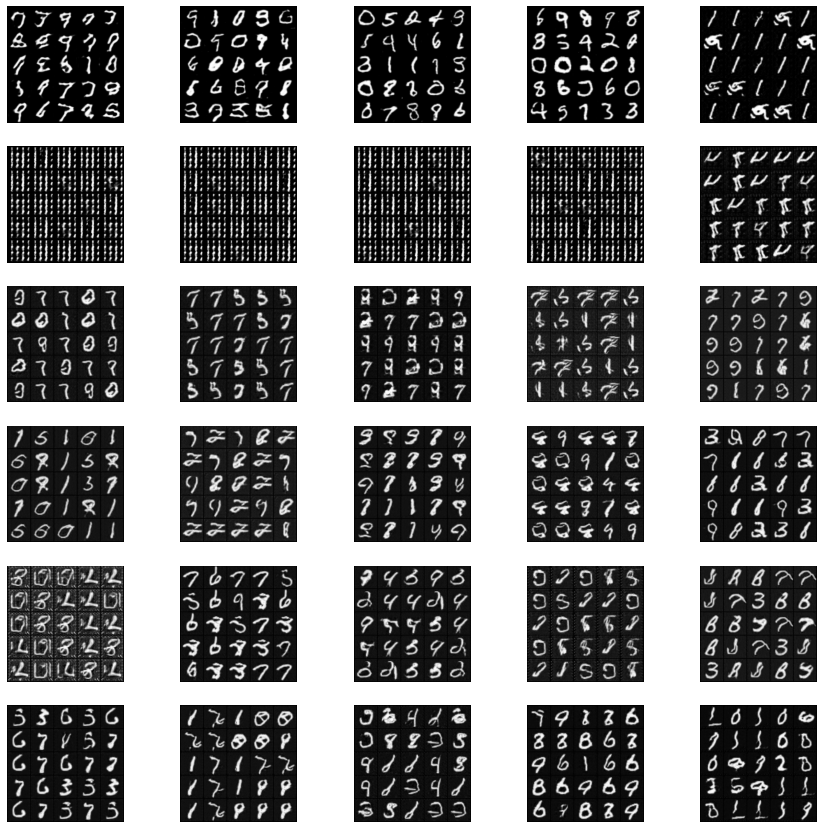

In [18]:
import matplotlib.pyplot as plt

fig, axs=plt.subplots(6, 5, figsize=(15, 15))
# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
# fig.tight_layout()
for i in range(1, 31):
    axs[(i-1)//5][(i-1)%5].set_axis_off()
    img=plt.imread(f"./gen_images/{i*10}.png")
    axs[(i-1)//5][(i-1)%5].imshow(img)
plt.show()

The best generated images (I think) are at epoch 40:

![](./gen_images/40.png)

### Mode Collapse Problem

Ref: https://developers.google.com/machine-learning/gan/problems

During training, the quality of generated images oscillate between good and bad. But there is a trend that the generator tend to generate same numbers after trained for more epochs, which is called **mode collapse**.

The reason is the generator found the one fake image that seems most plausible to the discriminator, therefore it keeps producing this image to deceive the discriminator.

Here is a image of a small DCGAN model to show this problem. I found it during parameter tuning. 

After enlarging model parameters, this problem becomes not so obvious but still exists.

![](./gen_images_temp/300.png)

---

### A small DCGAN to Visualize Training Process

There is a small version of DCGAN which uses less filters and training samples, allowing me to show the training process in this notebook.

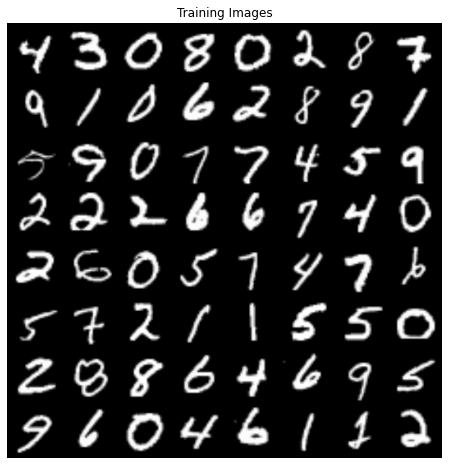

In [21]:
import torch
from torchvision import datasets
import torchvision.transforms as transforms
import numpy as np

# load data
image_size = 64
dataset = datasets.MNIST(
    "./data/mnist",
    train=True,
    download=True,
    transform=transforms.Compose(
        [
            transforms.Resize(image_size),
            transforms.CenterCrop(image_size),
            transforms.ToTensor(),
            transforms.Normalize((0.5,), (0.5,)),
        ]
    ),
)

indices = np.arange(5120)  # specify a subset
subset = torch.utils.data.Subset(dataset, indices)
dataloader = torch.utils.data.DataLoader(subset, batch_size=128, shuffle=True,)

import torchvision.utils as vutils

real_batch = next(iter(dataloader))
plt.figure(figsize=(8, 8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(
    np.transpose(
        vutils.make_grid(real_batch[0][:64], padding=2, normalize=True).cpu(), (1, 2, 0)
    )
)
plt.show()

2022-05-22 13:35:48.213313 Epoch 10 	Generator Loss = 6.80029 Discriminator Loss = 0.00221 
2022-05-22 13:36:24.633867 Epoch 20 	Generator Loss = 7.68391 Discriminator Loss = 0.32077 
2022-05-22 13:37:01.187882 Epoch 30 	Generator Loss = 7.33786 Discriminator Loss = 0.03909 
2022-05-22 13:37:37.731228 Epoch 40 	Generator Loss = 5.24957 Discriminator Loss = 0.08095 
2022-05-22 13:38:14.225177 Epoch 50 	Generator Loss = 4.92039 Discriminator Loss = 0.09712 
2022-05-22 13:38:50.753892 Epoch 60 	Generator Loss = 4.70978 Discriminator Loss = 0.10276 
2022-05-22 13:39:27.424226 Epoch 70 	Generator Loss = 4.64915 Discriminator Loss = 0.09099 
2022-05-22 13:40:04.027376 Epoch 80 	Generator Loss = 4.63345 Discriminator Loss = 0.25411 
2022-05-22 13:40:40.494586 Epoch 90 	Generator Loss = 2.68628 Discriminator Loss = 0.50809 
2022-05-22 13:41:16.928929 Epoch 100 	Generator Loss = 4.44248 Discriminator Loss = 0.22027 
2022-05-22 13:41:53.386081 Epoch 110 	Generator Loss = 5.09593 Discriminator Lo

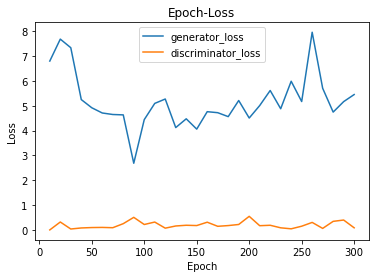

In [25]:
from DCGAN import Generator, Discriminator, train

device = "cuda:2"

generator = Generator(
    noise_dim=100, hidden_channels_base=64, output_channels=1
).to(device)
discriminator = Discriminator(input_channels=1, hidden_channels_base=64).to(device)
optimizer_G = torch.optim.Adam(generator.parameters(), lr=0.0002)
optimizer_D = torch.optim.Adam(discriminator.parameters(), lr=0.0002)

train(
    dataloader,
    discriminator,
    generator,
    optimizer_G,
    optimizer_D,
    noise_dim=100,
    max_epochs=300,
    verbose=10,
    save_interval=5,
    save_image_path="./gen_images_small/",
    visual_model=True,
    quiet=False,
)

In [32]:
import os
torch.save(generator.state_dict(), os.path.join("./model/", f"small_DCGAN_gen.pt"))

In [31]:
%%capture trash
import matplotlib.animation as animation

fig = plt.figure(figsize=(10, 10))
plt.axis("off")
ims = []
for i in range(1, 61):
    ims.append([plt.imshow(plt.imread(f"./gen_images_small/{i*5}.png"), animated=True)])
ani = animation.ArtistAnimation(fig, ims, interval=500, repeat_delay=1000, blit=True)
ani.save("small_DCGAN_train.gif", writer="pillow")

Save the generated images every 5 epochs and make a GIF picture.

The GIF is also shown at the beginning of this notebook.

<img src=small_DCGAN_train.gif width=20% />

## Task 3

Sample 2 images from your GAN (make sure that they are of different classes). Interpolate between these two digits
in latent space and include the results in your jupyter notebook. Use 7 interpolation steps, resulting in 9 images
(including start and end point).

0 -> 5 -> 9 -> 7

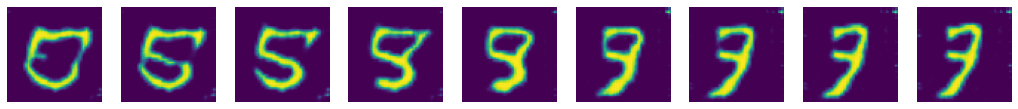

In [68]:
noises = []

start=torch.randn(1, 100, 1, 1).to(device)
end=torch.randn(1, 100, 1, 1).to(device)

for i in range(9):
    noise = start + (end - start) / 9 * i
    noises.append(noise)
    
fig, axs = plt.subplots(1, 9, figsize=(18, 18))
for i in range(len(noises)):
    img = generator(noises[i]).squeeze().cpu().detach().numpy()
    axs[i].set_axis_off()
    axs[i].imshow(img)
plt.show()